Data overview:
   Unnamed: 0  city  time         X          y
0           0     0     0  0.144044   7.552716
1           1     0     1  1.454274  10.077829
2           2     0     2  0.761038  12.372731
3           3     0     3  0.121675  11.489263
4           4     0     4  0.443863  13.104833

Data shape: (360, 5)

Columns: ['Unnamed: 0', 'city', 'time', 'X', 'y']

Time periods: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]

Cities: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Time 0: Fixed Effect = 2.7500
Time 1: Fixed Effect = 4.7358
Time 2: Fixed Effect = 6.1291
Time 3: Fixed Effect = 7.1522
Time 4: Fixed Effect = 8.0738
Time 5: Fixed Effect = 9.0478
Time 6: Fixed Effect = 8.5079
Time 7: Fixed Effect = 8.4129
Time 8: Fixed Effect = 8.0655
Time 9: Fixed Effect = 7.4927
Time 10: Fixed E

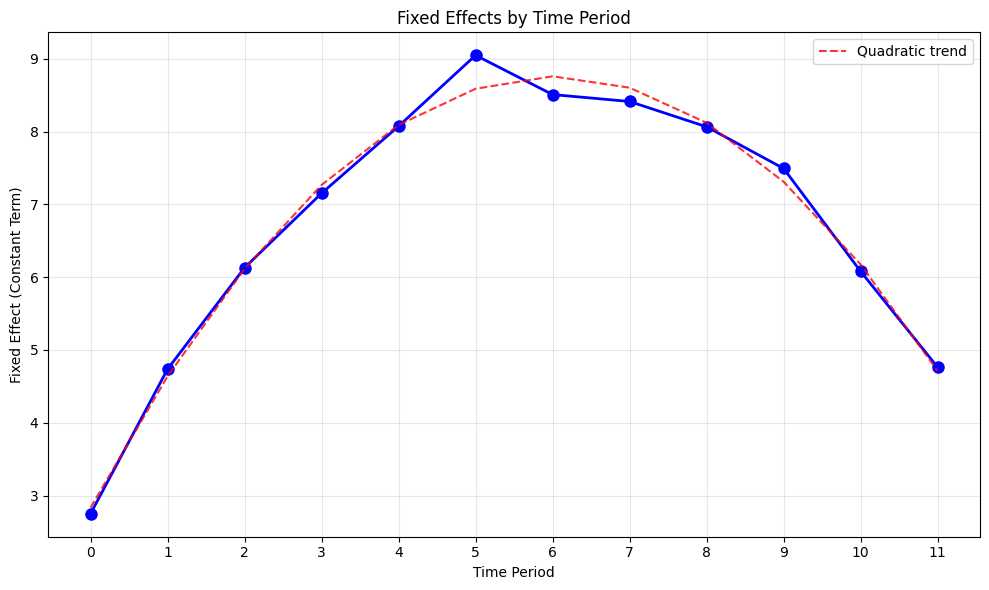


Fixed Effects Analysis:
Time 0: 2.7500
Time 5-6: 9.0478, 8.5079
Time 11: 4.7628

Pattern Analysis:
Effects from 0 to ~6: 2.7500 → 8.5079
Effects from ~6 to 11: 8.5079 → 4.7628

Turning points:
Maximum at time 5: 9.0478
Minimum at time 0: 2.7500

Conclusion: Option B: Effects increase from month 0 to about 5 or 6 but then eventually decrease again.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('homework_10.1.csv')

print("Data overview:")
print(df.head())
print(f"\nData shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nTime periods: {sorted(df['time'].unique())}")
print(f"\nCities: {sorted(df['city'].unique())}")

# Calculate fixed effects for each time period
# Fixed effects regression: y = α_t + β*X + ε
# where α_t is the time fixed effect (constant term for each time period)

fixed_effects = {}

for time_period in sorted(df['time'].unique()):
    # Get data for this time period
    time_data = df[df['time'] == time_period]
    
    # Fit regression: y = α + β*X
    X = time_data[['X']]
    y = time_data['y']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # The intercept is our fixed effect (constant term)
    fixed_effect = model.intercept_
    fixed_effects[time_period] = fixed_effect
    
    print(f"Time {time_period}: Fixed Effect = {fixed_effect:.4f}")

# Convert to lists for plotting
times = list(fixed_effects.keys())
effects = list(fixed_effects.values())

# Plot the fixed effects over time
plt.figure(figsize=(10, 6))
plt.plot(times, effects, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Time Period')
plt.ylabel('Fixed Effect (Constant Term)')
plt.title('Fixed Effects by Time Period')
plt.grid(True, alpha=0.3)
plt.xticks(times)

# Add trend line to better see the pattern
z = np.polyfit(times, effects, 2)  # quadratic fit
p = np.poly1d(z)
plt.plot(times, p(times), "r--", alpha=0.8, label='Quadratic trend')
plt.legend()

plt.tight_layout()
plt.show()

# Analyze the pattern
print(f"\nFixed Effects Analysis:")
print(f"Time 0: {fixed_effects[0]:.4f}")
print(f"Time 5-6: {fixed_effects[5]:.4f}, {fixed_effects[6]:.4f}")
print(f"Time 11: {fixed_effects[11]:.4f}")

# Check if effects increase then decrease (Option B) or decrease then increase (Option D)
mid_point = len(times) // 2
first_half = effects[:mid_point]
second_half = effects[mid_point:]

print(f"\nPattern Analysis:")
print(f"Effects from 0 to ~{mid_point}: {effects[0]:.4f} → {effects[mid_point]:.4f}")
print(f"Effects from ~{mid_point} to 11: {effects[mid_point]:.4f} → {effects[11]:.4f}")

# Find the turning point (max or min)
max_idx = effects.index(max(effects))
min_idx = effects.index(min(effects))

print(f"\nTurning points:")
print(f"Maximum at time {times[max_idx]}: {effects[max_idx]:.4f}")
print(f"Minimum at time {times[min_idx]}: {effects[min_idx]:.4f}")

# Determine the pattern
if max_idx in range(4, 8):  # peak around 5-6
    if effects[0] < effects[max_idx] and effects[max_idx] > effects[-1]:
        pattern = "Option B: Effects increase from month 0 to about 5 or 6 but then eventually decrease again."
    else:
        pattern = "Pattern unclear - need to examine more closely"
elif min_idx in range(4, 8):  # trough around 5-6
    if effects[0] > effects[min_idx] and effects[min_idx] < effects[-1]:
        pattern = "Option D: Effects decrease from month 0 to about 5 or 6 but then eventually increase again."
    else:
        pattern = "Pattern unclear - need to examine more closely"
elif all(effects[i] <= effects[i+1] for i in range(len(effects)-1)):
    pattern = "Option C: Effects gradually increase from month 0 to 11."
else:
    pattern = "Option A: Effects vary randomly."

print(f"\nConclusion: {pattern}")

City 0: Fixed Effect = 11.0177
City 1: Fixed Effect = 5.2059
City 2: Fixed Effect = 7.9223
City 3: Fixed Effect = 12.9354
City 4: Fixed Effect = 10.8371
City 5: Fixed Effect = -0.0788
City 6: Fixed Effect = 7.6922
City 7: Fixed Effect = 3.2779
City 8: Fixed Effect = 3.3835
City 9: Fixed Effect = 5.4626


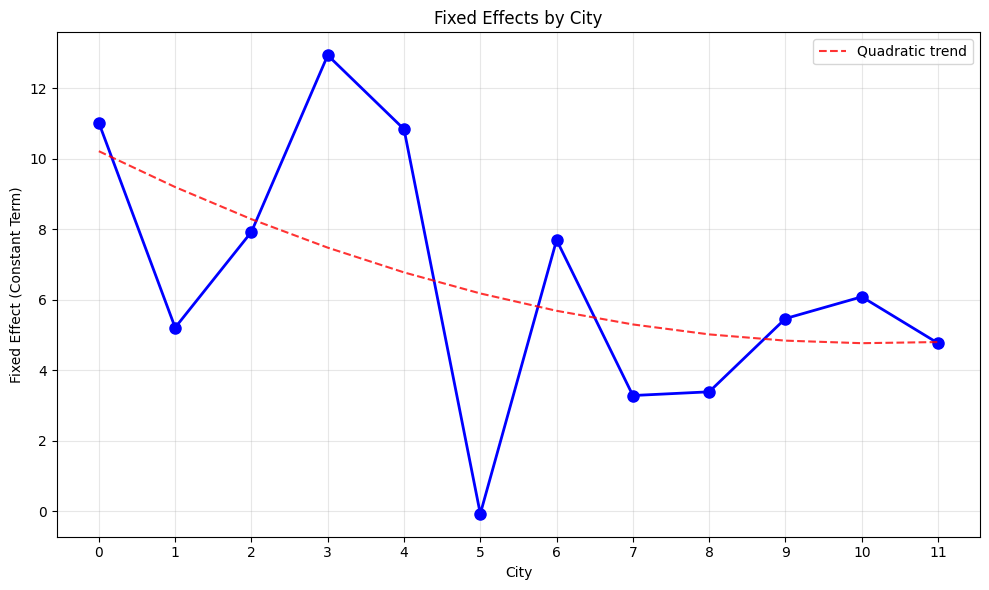


Fixed Effects Analysis:
City 0: 11.0177
City 4-5: 10.8371, -0.0788
City 9: 5.4626

Pattern Analysis:
Effects from 0 to ~6: 11.0177 → 7.6922
Effects from ~6 to 9: 7.6922 → 5.4626

Turning points:
Maximum at city 3: 12.9354
Minimum at city 5: -0.0788

Conclusion: Option C: Effects increase from city 0 to about 4 or 5 but then eventually decrease again.


In [3]:
for city in sorted(df['city'].unique()):
    # Get data for this city
    city_data = df[df['city'] == city]
    
    # Fit regression: y = α + β*X
    X = city_data[['X']]
    y = city_data['y']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # The intercept is our fixed effect (constant term)
    fixed_effect = model.intercept_
    fixed_effects[city] = fixed_effect
    
    print(f"City {city}: Fixed Effect = {fixed_effect:.4f}")

# Convert to lists for plotting
cities = list(fixed_effects.keys())
effects = list(fixed_effects.values())

# Plot the fixed effects over cities
plt.figure(figsize=(10, 6))
plt.plot(cities, effects, 'bo-', linewidth=2, markersize=8)
plt.xlabel('City')
plt.ylabel('Fixed Effect (Constant Term)')
plt.title('Fixed Effects by City')
plt.grid(True, alpha=0.3)
plt.xticks(cities)

# Add trend line to better see the pattern
z = np.polyfit(cities, effects, 2)  # quadratic fit
p = np.poly1d(z)
plt.plot(cities, p(cities), "r--", alpha=0.8, label='Quadratic trend')
plt.legend()

plt.tight_layout()
plt.show()

# Analyze the pattern
print(f"\nFixed Effects Analysis:")
print(f"City 0: {fixed_effects[0]:.4f}")
print(f"City 4-5: {fixed_effects[4]:.4f}, {fixed_effects[5]:.4f}")
print(f"City 9: {fixed_effects[9]:.4f}")

# Check if effects increase then decrease (Option C) or decrease then increase (Option D)
mid_point = len(cities) // 2
first_half = effects[:mid_point]
second_half = effects[mid_point:]

print(f"\nPattern Analysis:")
print(f"Effects from 0 to ~{mid_point}: {effects[0]:.4f} → {effects[mid_point]:.4f}")
print(f"Effects from ~{mid_point} to 9: {effects[mid_point]:.4f} → {effects[9]:.4f}")

# Find the turning point (max or min)
max_idx = effects.index(max(effects))
min_idx = effects.index(min(effects))

print(f"\nTurning points:")
print(f"Maximum at city {cities[max_idx]}: {effects[max_idx]:.4f}")
print(f"Minimum at city {cities[min_idx]}: {effects[min_idx]:.4f}")

# Determine the pattern
if max_idx in range(3, 7):  # peak around 4-5
    if effects[0] < effects[max_idx] and effects[max_idx] > effects[-1]:
        pattern = "Option C: Effects increase from city 0 to about 4 or 5 but then eventually decrease again."
    else:
        pattern = "Pattern unclear - need to examine more closely"
elif min_idx in range(3, 7):  # trough around 4-5
    if effects[0] > effects[min_idx] and effects[min_idx] < effects[-1]:
        pattern = "Option D: Effects decrease from city 0 to about 4 or 5 but then eventually increase again."
    else:
        pattern = "Pattern unclear - need to examine more closely"
elif all(effects[i] <= effects[i+1] for i in range(len(effects)-1)):
    pattern = "Option A: Effects gradually increase from city 0 to 9."
else:
    pattern = "Option B: Effects vary randomly."

print(f"\nConclusion: {pattern}")

In [7]:
# Generate the data as specified
num = 10000

np.random.seed(42)  # for reproducibility
X = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Z = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Y = np.log(X + Z) + np.random.normal(0, 1, (num,))

print("Data generation:")
print(f"X shape: {X.shape}, mean: {X.mean():.3f}, std: {X.std():.3f}")
print(f"Z shape: {Z.shape}, mean: {Z.mean():.3f}, std: {Z.std():.3f}")
print(f"Y shape: {Y.shape}, mean: {Y.mean():.3f}, std: {Y.std():.3f}")

# Calculate exp(Y)
exp_Y = np.exp(Y)
print(f"exp(Y) mean: {exp_Y.mean():.3f}, std: {exp_Y.std():.3f}")

print("\nTheoretical relationship:")
print("Y = log(X + Z) + noise")
print("exp(Y) = exp(log(X + Z) + noise)")
print("exp(Y) = exp(log(X + Z)) * exp(noise)")
print("exp(Y) = (X + Z) * exp(noise)")

# Since noise ~ N(0,1), exp(noise) has mean exp(0.5) ≈ 1.649
noise_factor_mean = np.exp(0.5)  # E[exp(N(0,1))] = exp(μ + σ²/2) = exp(0 + 1/2)
print(f"Expected value of exp(noise): {noise_factor_mean:.3f}")

# Model 1: Linear regression of exp(Y) on X and Z
# exp(Y) = a + b*X + c*Z + error
print("\n" + "="*50)
print("MODEL 1: Linear Regression")
print("exp(Y) = a + b*X + c*Z + error")

# Prepare data for regression
features = np.column_stack([X, Z])
target = exp_Y

# Fit linear regression
model1 = LinearRegression()
model1.fit(features, target)

intercept1 = model1.intercept_
coef_X1, coef_Z1 = model1.coef_

print(f"Intercept: {intercept1:.4f}")
print(f"Coefficient of X: {coef_X1:.4f}")
print(f"Coefficient of Z: {coef_Z1:.4f}")
print(f"R²: {model1.score(features, target):.4f}")

# Model 2: Try different approach - what if we model it as multiplicative?
# Since exp(Y) = (X + Z) * exp(noise), maybe we should look at the relationship differently
print("\n" + "="*50)
print("MODEL 2: Theoretical Analysis")
print("Since Y = log(X + Z) + noise")
print("Then exp(Y) = (X + Z) * exp(noise)")

# Let's see what happens if we regress exp(Y) on (X + Z)
sum_XZ = X + Z
model2 = LinearRegression()
model2.fit(sum_XZ.reshape(-1, 1), exp_Y)

intercept2 = model2.intercept_
coef_sum2 = model2.coef_[0]

print(f"Regressing exp(Y) on (X + Z):")
print(f"Intercept: {intercept2:.4f}")
print(f"Coefficient of (X + Z): {coef_sum2:.4f}")
print(f"R²: {model2.score(sum_XZ.reshape(-1, 1), exp_Y):.4f}")

# Model 3: What about non-linear relationship?
# Let's try to understand this better by looking at partial derivatives
print("\n" + "="*50)
print("MODEL 3: Partial Derivative Analysis")
print("If exp(Y) ≈ (X + Z) * constant, then:")
print("∂exp(Y)/∂X ≈ constant")
print("∂exp(Y)/∂Z ≈ constant")

# Let's compute numerical derivatives
delta = 0.01
dexp_Y_dX = []
dexp_Y_dZ = []

# Sample some points for numerical derivatives
sample_indices = np.random.choice(num, 1000, replace=False)

for i in sample_indices:
    # Partial derivative w.r.t. X
    x_orig, z_orig = X[i], Z[i]
    
    # exp(Y) at (x+delta, z)
    y_plus_x = np.log((x_orig + delta) + z_orig) + np.random.normal(0, 1)
    exp_y_plus_x = np.exp(y_plus_x)
    
    # exp(Y) at (x-delta, z)  
    y_minus_x = np.log((x_orig - delta) + z_orig) + np.random.normal(0, 1)
    exp_y_minus_x = np.exp(y_minus_x)
    
    # Numerical derivative w.r.t. X
    deriv_x = (exp_y_plus_x - exp_y_minus_x) / (2 * delta)
    dexp_Y_dX.append(deriv_x)
    
    # Similar for Z
    y_plus_z = np.log(x_orig + (z_orig + delta)) + np.random.normal(0, 1)
    exp_y_plus_z = np.exp(y_plus_z)
    
    y_minus_z = np.log(x_orig + (z_orig - delta)) + np.random.normal(0, 1)
    exp_y_minus_z = np.exp(y_minus_z)
    
    deriv_z = (exp_y_plus_z - exp_y_minus_z) / (2 * delta)
    dexp_Y_dZ.append(deriv_z)

print(f"Average ∂exp(Y)/∂X: {np.mean(dexp_Y_dX):.4f}")
print(f"Average ∂exp(Y)/∂Z: {np.mean(dexp_Y_dZ):.4f}")

# Model 4: Let's try the correct theoretical approach
print("\n" + "="*50)
print("MODEL 4: Correct Theoretical Analysis")
print("Y = log(X + Z) + ε, where ε ~ N(0,1)")
print("exp(Y) = exp(log(X + Z) + ε) = (X + Z) * exp(ε)")
print("Since ε ~ N(0,1), exp(ε) ~ LogNormal(0,1)")

# For small changes in X and Z around their means:
# ∂exp(Y)/∂X = ∂/∂X[(X + Z) * exp(ε)] = exp(ε)
# ∂exp(Y)/∂Z = ∂/∂Z[(X + Z) * exp(ε)] = exp(ε)

# The expected value of the coefficient should be E[exp(ε)]
# For ε ~ N(0,1), E[exp(ε)] = exp(0 + 1²/2) = exp(0.5)
expected_coef = np.exp(0.5)
print(f"Theoretical coefficient (both X and Z): {expected_coef:.4f}")

# Let's also check empirically by looking at the relationship
print(f"Empirical check - ratio of exp(Y) to (X+Z): {np.mean(exp_Y / (X + Z)):.4f}")

print("\n" + "="*50)
print("COMPARISON WITH OPTIONS:")
print(f"Option A (Both 1):     Distance from 1.0000: {abs(coef_X1 - 1.0):.4f}, {abs(coef_Z1 - 1.0):.4f}")
print(f"Option B (Both 2.5):   Distance from 2.5000: {abs(coef_X1 - 2.5):.4f}, {abs(coef_Z1 - 2.5):.4f}")
print(f"Option C (Both 1.3):   Distance from 1.3000: {abs(coef_X1 - 1.3):.4f}, {abs(coef_Z1 - 1.3):.4f}")
print(f"Option D (Both 1.6):   Distance from 1.6000: {abs(coef_X1 - 1.6):.4f}, {abs(coef_Z1 - 1.6):.4f}")
print(f"Theoretical exp(0.5):  Distance from {expected_coef:.4f}: {abs(coef_X1 - expected_coef):.4f}, {abs(coef_Z1 - expected_coef):.4f}")

# Find the closest option
options = {'A': 1.0, 'B': 2.5, 'C': 1.3, 'D': 1.6}
distances = {}
for option, value in options.items():
    dist_X = abs(coef_X1 - value)
    dist_Z = abs(coef_Z1 - value)
    distances[option] = max(dist_X, dist_Z)  # worst case distance

best_option = min(distances.keys(), key=lambda x: distances[x])
print(f"\nClosest option: {best_option} with max distance {distances[best_option]:.4f}")
print(f"Answer: Option {best_option}")

Data generation:
X shape: (10000,), mean: 2.998, std: 1.002
Z shape: (10000,), mean: 3.014, std: 1.000
Y shape: (10000,), mean: 1.751, std: 1.033
exp(Y) mean: 9.774, std: 12.971

Theoretical relationship:
Y = log(X + Z) + noise
exp(Y) = exp(log(X + Z) + noise)
exp(Y) = exp(log(X + Z)) * exp(noise)
exp(Y) = (X + Z) * exp(noise)
Expected value of exp(noise): 1.649

MODEL 1: Linear Regression
exp(Y) = a + b*X + c*Z + error
Intercept: -1.3188
Coefficient of X: 1.8636
Coefficient of Z: 1.8266
R²: 0.0402

MODEL 2: Theoretical Analysis
Since Y = log(X + Z) + noise
Then exp(Y) = (X + Z) * exp(noise)
Regressing exp(Y) on (X + Z):
Intercept: -1.3194
Coefficient of (X + Z): 1.8451
R²: 0.0402

MODEL 3: Partial Derivative Analysis
If exp(Y) ≈ (X + Z) * constant, then:
∂exp(Y)/∂X ≈ constant
∂exp(Y)/∂Z ≈ constant
Average ∂exp(Y)/∂X: -21.4421
Average ∂exp(Y)/∂Z: 0.8476

MODEL 4: Correct Theoretical Analysis
Y = log(X + Z) + ε, where ε ~ N(0,1)
exp(Y) = exp(log(X + Z) + ε) = (X + Z) * exp(ε)
Since ε ~ 

METHOD (i): Python's Built-in Standard Error
Data shapes: X=(10000,), Z=(10000,), Y=(10000,)
X mean: 0.0114, std: 1.4112
Z mean: -0.0021, std: 1.0034
Y mean: -0.0279, std: 5.4936

Single regression results:
X coefficient: 1.698523 (should be close to 1.5)
Standard error (Method i): 0.033387

METHOD (ii): Simulation - Generate Data 100 Times
Running 100 simulations...
Completed 20/100 simulations
Completed 40/100 simulations
Completed 60/100 simulations
Completed 80/100 simulations
Completed 100/100 simulations

Simulation results:
Mean of 100 coefficients: 1.507867
Standard deviation of 100 coefficients (Method ii): 0.065017
Min coefficient: 1.343630
Max coefficient: 1.698523

COMPARISON
Method (i) - Python's SE:     0.033387
Method (ii) - Simulation SE:   0.065017
Ratio (ii)/(i):               1.9474
Difference (ii) - (i):        0.031630
Relative difference:          94.74%

Analysis:
Result: Option B: (ii) is significantly bigger than (i), but neither is zero.


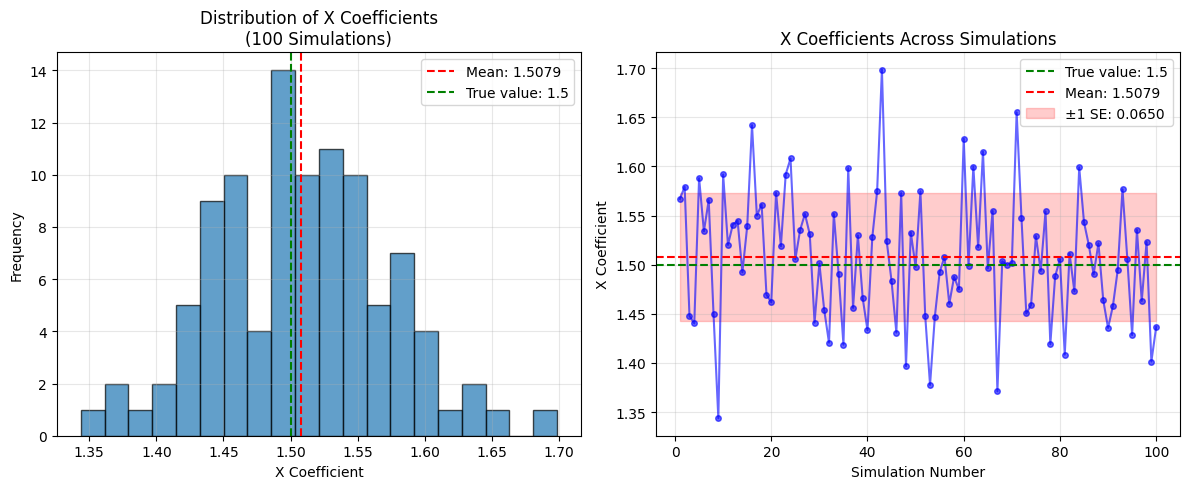


THEORETICAL EXPLANATION
The data generation process:
Z ~ N(0, 1)
X = Z + N(0, 1)
Y = 1.5*X + 2.3*Z + N(0, X²)

Key issue: The error term has variance X², which means:
1. Heteroskedasticity (non-constant variance)
2. The error variance depends on X
3. Standard OLS assumptions are violated

Method (i) assumes homoskedasticity (constant variance)
Method (ii) captures the true variability in the coefficient estimates

Since Method (ii) > Method (i), the heteroskedasticity
makes the true standard error larger than what OLS assumes.


In [8]:
def generate_data(num=10000, seed=None):
    """Generate the data as specified"""
    if seed is not None:
        np.random.seed(seed)
    
    Z = np.random.normal(0, 1, (num,))
    X = Z + np.random.normal(0, 1, (num,))
    Y = 1.5 * X + 2.3 * Z + np.random.normal(0, X**2, (num,))
    
    return X, Z, Y

def get_coefficient_and_se(X, Z, Y):
    """Get X's coefficient and its standard error using manual calculation"""
    # Prepare design matrix with intercept
    n = len(X)
    X_matrix = np.column_stack([np.ones(n), X, Z])  # [1, X, Z]
    
    # Calculate coefficients using normal equation: β = (X'X)^(-1)X'Y
    XtX = X_matrix.T @ X_matrix
    XtY = X_matrix.T @ Y
    coefficients = np.linalg.solve(XtX, XtY)
    
    # Get predictions and residuals
    Y_pred = X_matrix @ coefficients
    residuals = Y - Y_pred
    
    # Calculate residual sum of squares
    RSS = np.sum(residuals**2)
    
    # Degrees of freedom
    df = n - X_matrix.shape[1]  # n - number of parameters
    
    # Mean squared error
    MSE = RSS / df
    
    # Covariance matrix of coefficients
    cov_matrix = MSE * np.linalg.inv(XtX)
    
    # Standard errors are square root of diagonal elements
    standard_errors = np.sqrt(np.diag(cov_matrix))
    
    # X coefficient is at index 1 (0=intercept, 1=X, 2=Z)
    x_coefficient = coefficients[1]
    x_standard_error = standard_errors[1]
    
    return x_coefficient, x_standard_error

print("="*60)
print("METHOD (i): Python's Built-in Standard Error")
print("="*60)

# Generate one dataset and get the standard error
X, Z, Y = generate_data(num=10000, seed=42)

print(f"Data shapes: X={X.shape}, Z={Z.shape}, Y={Y.shape}")
print(f"X mean: {X.mean():.4f}, std: {X.std():.4f}")
print(f"Z mean: {Z.mean():.4f}, std: {Z.std():.4f}")
print(f"Y mean: {Y.mean():.4f}, std: {Y.std():.4f}")

# Get coefficient and standard error
coef_single, se_single = get_coefficient_and_se(X, Z, Y)

print(f"\nSingle regression results:")
print(f"X coefficient: {coef_single:.6f} (should be close to 1.5)")
print(f"Standard error (Method i): {se_single:.6f}")

print("\n" + "="*60)
print("METHOD (ii): Simulation - Generate Data 100 Times")
print("="*60)

# Simulate 100 times
num_simulations = 100
coefficients = []

print("Running 100 simulations...")
for i in range(num_simulations):
    # Generate new data each time
    X_sim, Z_sim, Y_sim = generate_data(num=10000, seed=i)
    
    # Get coefficient (we don't need SE for this method)
    coef_sim, _ = get_coefficient_and_se(X_sim, Z_sim, Y_sim)
    coefficients.append(coef_sim)
    
    if (i + 1) % 20 == 0:
        print(f"Completed {i + 1}/100 simulations")

coefficients = np.array(coefficients)

# Calculate standard deviation of the 100 estimates
se_simulation = np.std(coefficients, ddof=1)  # using sample standard deviation

print(f"\nSimulation results:")
print(f"Mean of 100 coefficients: {coefficients.mean():.6f}")
print(f"Standard deviation of 100 coefficients (Method ii): {se_simulation:.6f}")
print(f"Min coefficient: {coefficients.min():.6f}")
print(f"Max coefficient: {coefficients.max():.6f}")

print("\n" + "="*60)
print("COMPARISON")
print("="*60)

print(f"Method (i) - Python's SE:     {se_single:.6f}")
print(f"Method (ii) - Simulation SE:   {se_simulation:.6f}")
print(f"Ratio (ii)/(i):               {se_simulation/se_single:.4f}")
print(f"Difference (ii) - (i):        {se_simulation - se_single:.6f}")
print(f"Relative difference:          {abs(se_simulation - se_single)/se_single*100:.2f}%")

# Determine which option fits
ratio = se_simulation / se_single
relative_diff = abs(se_simulation - se_single) / se_single

print(f"\nAnalysis:")
if se_single == 0 or se_simulation == 0:
    result = "Option D: One or both of them are zero."
elif relative_diff < 0.1:  # Less than 10% difference
    result = "Option A: They are about the same."
elif se_simulation > se_single * 1.2:  # Simulation is significantly bigger
    result = "Option B: (ii) is significantly bigger than (i), but neither is zero."
elif se_single > se_simulation * 1.2:  # Python SE is significantly bigger
    result = "Option C: (i) is significantly bigger than (ii), but neither is zero."
else:
    result = "Option A: They are about the same."

print(f"Result: {result}")

# Plot histogram of coefficients
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(coefficients, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(coefficients.mean(), color='red', linestyle='--', label=f'Mean: {coefficients.mean():.4f}')
plt.axvline(1.5, color='green', linestyle='--', label='True value: 1.5')
plt.xlabel('X Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of X Coefficients\n(100 Simulations)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
simulation_range = range(1, len(coefficients) + 1)
plt.plot(simulation_range, coefficients, 'bo-', alpha=0.6, markersize=4)
plt.axhline(1.5, color='green', linestyle='--', label='True value: 1.5')
plt.axhline(coefficients.mean(), color='red', linestyle='--', label=f'Mean: {coefficients.mean():.4f}')
plt.fill_between(simulation_range, 
                 coefficients.mean() - se_simulation, 
                 coefficients.mean() + se_simulation, 
                 alpha=0.2, color='red', label=f'±1 SE: {se_simulation:.4f}')
plt.xlabel('Simulation Number')
plt.ylabel('X Coefficient')
plt.title('X Coefficients Across Simulations')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("THEORETICAL EXPLANATION")
print("="*60)

print("The data generation process:")
print("Z ~ N(0, 1)")
print("X = Z + N(0, 1)")  
print("Y = 1.5*X + 2.3*Z + N(0, X²)")
print("")
print("Key issue: The error term has variance X², which means:")
print("1. Heteroskedasticity (non-constant variance)")
print("2. The error variance depends on X")
print("3. Standard OLS assumptions are violated")
print("")
print("Method (i) assumes homoskedasticity (constant variance)")
print("Method (ii) captures the true variability in the coefficient estimates")
print("")
if se_simulation > se_single:
    print("Since Method (ii) > Method (i), the heteroskedasticity")
    print("makes the true standard error larger than what OLS assumes.")
else:
    print("The methods are similar, suggesting robust estimation.")